The dataset is used to predict whether a person has a chance to get stroke or not using the inputs such as age, gender, work type, residential type, smoking status etc.

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

Read dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/full_data.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


Learning dataset

Smoking status in males and females

<Axes: xlabel='smoking_status', ylabel='count'>

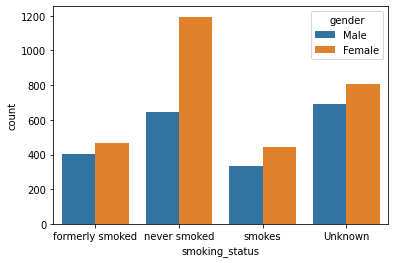

In [ ]:
sns.countplot(x='smoking_status',data=df,hue='gender')

Count of patients with respect to gender

<Axes: xlabel='gender', ylabel='count'>

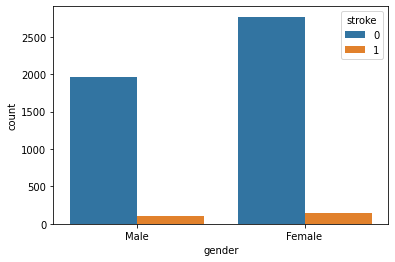

In [ ]:
sns.countplot(x='gender',data=df,hue='stroke')

Pair relationship

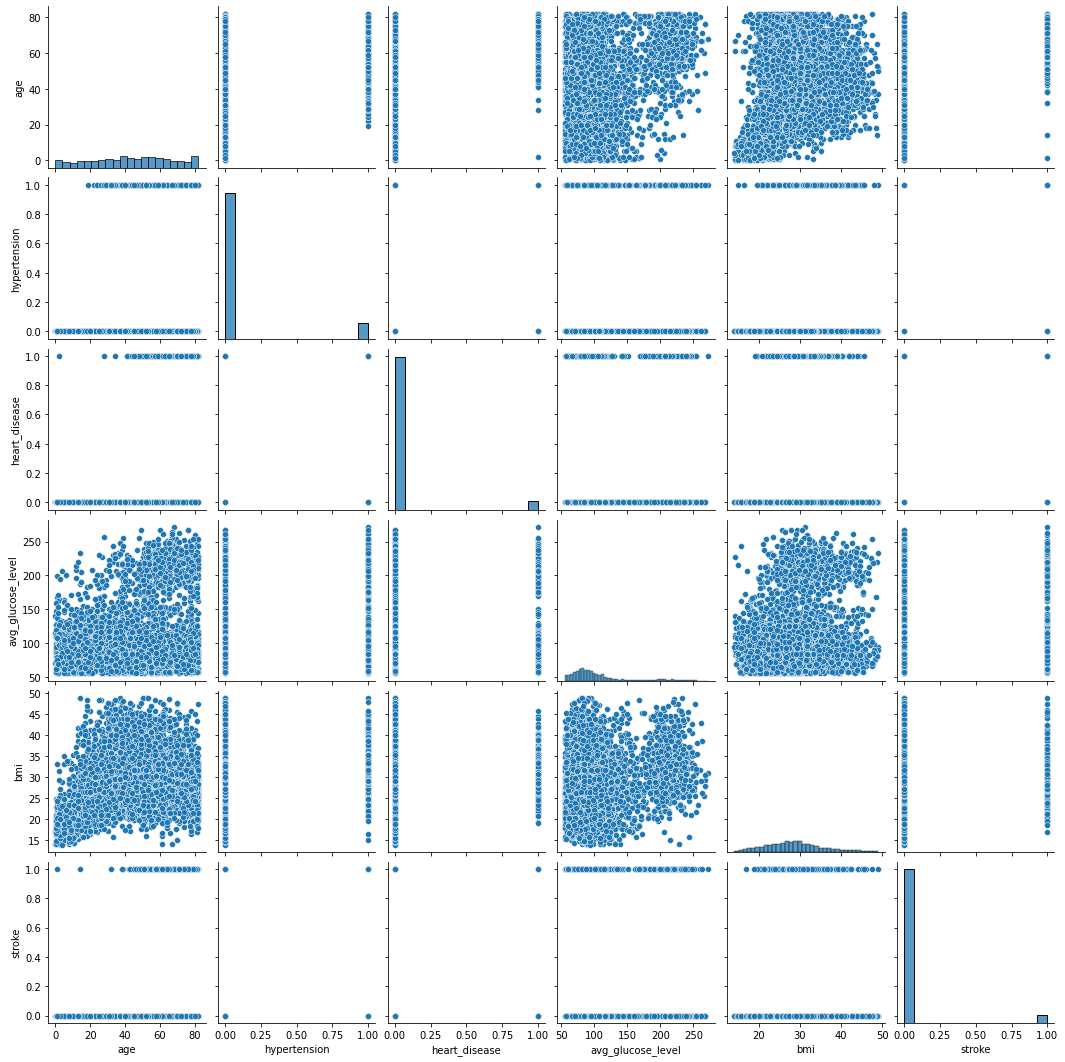

In [ ]:
sns.pairplot(df)

Work type dependency on stroke

<Axes: xlabel='work_type', ylabel='stroke'>

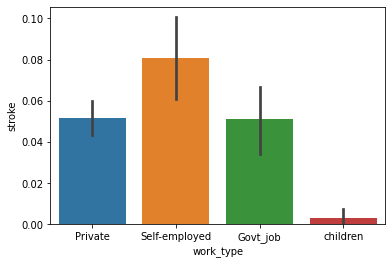

In [ ]:
sns.barplot(x='work_type',y='stroke',data=df)

Count of stroke patients in the dataset

<Axes: xlabel='stroke', ylabel='count'>

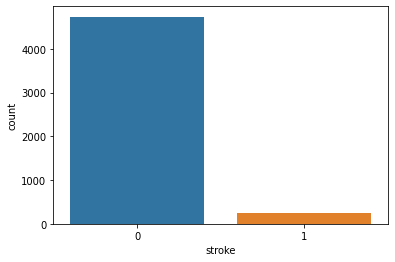

In [ ]:
sns.countplot(x='stroke',data=df)

Checking datatypes

In [ ]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Checking null values

In [ ]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Changing datatype 'object'

In [ ]:
le=LabelEncoder()
ls=['gender','ever_married','work_type','Residence_type','smoking_status']
for i in ls:
  df[i]=le.fit_transform(df[i])

In [ ]:
df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

Checking correlation

In [ ]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.026538,0.021485,0.086476,-0.028971,0.065784,-0.004301,0.055796,-0.012093,-0.062666,0.008870
age,-0.026538,1.000000,0.278120,0.264852,0.677137,-0.415935,0.017155,0.236763,0.373703,0.265623,0.246478
hypertension,0.021485,0.278120,1.000000,0.111974,0.164534,-0.061618,-0.004755,0.170028,0.158762,0.110045,0.131965
heart_disease,0.086476,0.264852,0.111974,1.000000,0.114765,-0.036943,0.002125,0.166847,0.060926,0.048093,0.134610
ever_married,-0.028971,0.677137,0.164534,0.114765,1.000000,-0.406439,0.008191,0.150724,0.371690,0.262384,0.108398
work_type,0.065784,-0.415935,-0.061618,-0.036943,-0.406439,1.000000,-0.003524,-0.059658,-0.382418,-0.356738,-0.041835
Residence_type,-0.004301,0.017155,-0.004755,0.002125,0.008191,-0.003524,1.000000,0.001346,0.013185,0.010209,0.016494
avg_glucose_level,0.055796,0.236763,0.170028,0.166847,0.150724,-0.059658,0.001346,1.000000,0.186348,0.064089,0.133227
bmi,-0.012093,0.373703,0.158762,0.060926,0.371690,-0.382418,0.013185,0.186348,1.000000,0.243111,0.056926
smoking_status,-0.062666,0.265623,0.110045,0.048093,0.262384,-0.356738,0.010209,0.064089,0.243111,1.000000,0.027463


<Axes: >

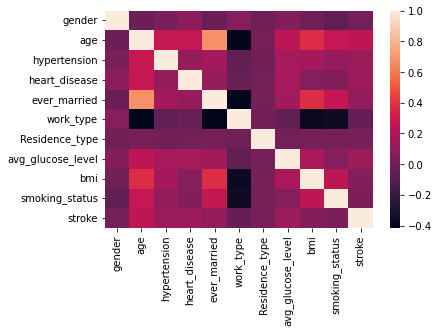

In [ ]:
sns.heatmap(df.corr())

Seperating input and output

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

Scaling using Minmax Scaler

In [ ]:
min=MinMaxScaler()
X=min.fit_transform(X)

Seperating training and testing dataset

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

K Nearest Neighbour classification

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

0.948494983277592
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1487
           1       0.05      0.50      0.09         8

    accuracy                           0.95      1495
   macro avg       0.52      0.73      0.53      1495
weighted avg       0.99      0.95      0.97      1495



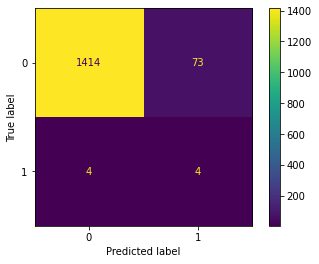

In [ ]:
A1=accuracy_score(y_pred,y_test)
print(A1)
print(classification_report(y_pred,y_test))
print(ConfusionMatrixDisplay.from_predictions(y_pred,y_test))

Using oversampling in knn

In [ ]:
oversample=SMOTE(random_state=1)
X_os,y_os=oversample.fit_resample(X,y)
y_os.value_counts()

1    4733
0    4733
Name: stroke, dtype: int64

In [ ]:
print(Counter(y_os))

Counter({1: 4733, 0: 4733})


In [ ]:
X_trainos,X_testos,y_trainos,y_testos=train_test_split(X_os,y_os,test_size=0.2,random_state=1)

In [ ]:
knnos=KNeighborsClassifier(n_neighbors=5)
knnos.fit(X_trainos,y_trainos)
y_predos=knnos.predict(X_testos)
y_predos

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
print(classification_report(y_testos,y_predos))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       958
           1       0.84      0.99      0.90       936

    accuracy                           0.90      1894
   macro avg       0.91      0.90      0.90      1894
weighted avg       0.91      0.90      0.90      1894



Accuracy reduced after oversampling

Support Vector Machine Algorithm

In [ ]:
svm=SVC(kernel='poly')
svm.fit(X_train,y_train)
ypred2=svm.predict(X_test)
ypred2

array([0, 0, 0, ..., 0, 0, 0])

0.948494983277592
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1495
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1495
   macro avg       0.50      0.47      0.49      1495
weighted avg       1.00      0.95      0.97      1495



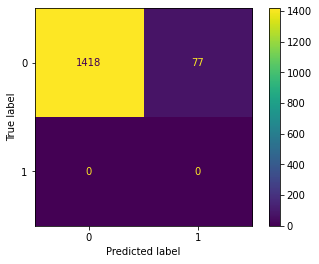

In [ ]:
A2=accuracy_score(ypred2,y_test)
print(A2)
print(classification_report(ypred2,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred2,y_test))

Naive Bayes Algorithm

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)
ypred3=nb.predict(X_test)
ypred3

array([0, 0, 0, ..., 0, 0, 0])

0.8655518394648829
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1305
           1       0.43      0.17      0.25       190

    accuracy                           0.87      1495
   macro avg       0.66      0.57      0.59      1495
weighted avg       0.83      0.87      0.84      1495



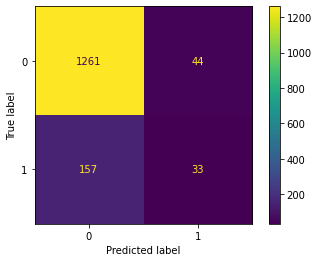

In [ ]:
A3=accuracy_score(ypred3,y_test)
print(A3)
print(classification_report(ypred3,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred3,y_test))

Random Forest Classifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
ypred4=rf.predict(X_test)
ypred4

array([0, 0, 0, ..., 0, 0, 0])

0.948494983277592
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1493
           1       0.01      0.50      0.03         2

    accuracy                           0.95      1495
   macro avg       0.51      0.72      0.50      1495
weighted avg       1.00      0.95      0.97      1495



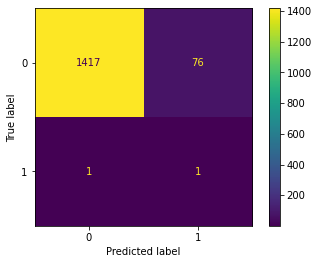

In [ ]:
A4=accuracy_score(ypred4,y_test)
print(A4)
print(classification_report(ypred4,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred4,y_test))

Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
ypred5=lr.predict(X_test)
ypred5

array([0, 0, 0, ..., 0, 0, 0])

0.948494983277592
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1495
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1495
   macro avg       0.50      0.47      0.49      1495
weighted avg       1.00      0.95      0.97      1495



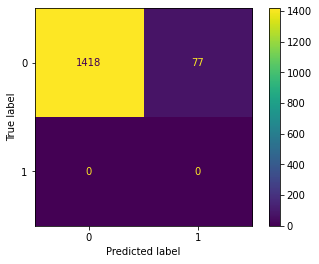

In [ ]:
A5=accuracy_score(ypred5,y_test)
print(A5)
print(classification_report(ypred5,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred5,y_test))

Adaboost Classifier

In [ ]:
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)
ypred6=abc.predict(X_test)
ypred6

array([0, 0, 0, ..., 0, 0, 0])

0.948494983277592
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1491
           1       0.03      0.50      0.05         4

    accuracy                           0.95      1495
   macro avg       0.51      0.72      0.51      1495
weighted avg       1.00      0.95      0.97      1495



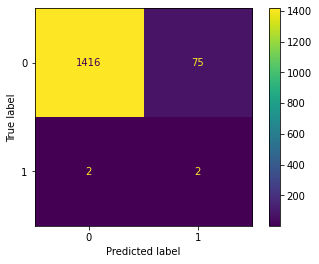

In [ ]:
A6=accuracy_score(ypred6,y_test)
print(A6)
print(classification_report(ypred6,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred6,y_test))

Extreme Gradient Booster Classifier

In [ ]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
ypred7=xgb.predict(X_test)
ypred7

array([0, 0, 0, ..., 0, 0, 0])

0.937123745819398
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1476
           1       0.01      0.05      0.02        19

    accuracy                           0.94      1495
   macro avg       0.50      0.50      0.49      1495
weighted avg       0.97      0.94      0.96      1495



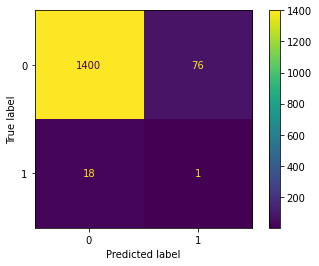

In [ ]:
A7=accuracy_score(ypred7,y_test)
print(A7)
print(classification_report(ypred7,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred7,y_test))

Decision Tree Classifier

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
ypred8=dt.predict(X_test)
ypred8

array([0, 0, 0, ..., 0, 0, 0])

0.9130434782608695
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1412
           1       0.19      0.18      0.19        83

    accuracy                           0.91      1495
   macro avg       0.57      0.57      0.57      1495
weighted avg       0.91      0.91      0.91      1495



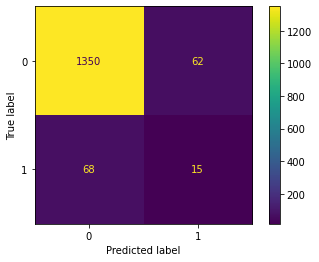

In [ ]:
A8=accuracy_score(ypred8,y_test)
print(A8)
print(classification_report(ypred8,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred8,y_test))

Creating dataframe to check accuracy

In [ ]:
eval=pd.DataFrame({'model':['K Nearest Neighbour','Support Vector Machine','Naive Bayes','Random Forest','Logistic Regression','Adaboost','Extreme Gradient Boost','Decision Tree'],'Accuracy':[A1*100,A2*100,A3*100,A4*100,A5*100,A6*100,A7*100,A8*100]})
eval

,model,Accuracy
0,K Nearest Neighbour,94.849498
1,Support Vector Machine,94.849498
2,Naive Bayes,86.555184
3,Random Forest,94.849498
4,Logistic Regression,94.849498
5,Adaboost,94.849498
6,Extreme Gradient Boost,93.712375
7,Decision Tree,91.304348


Naive Bayes algorithm has lowest accuracy.

Checking with oversampling

In [ ]:
oversample=SMOTE(random_state=1)
X_os1,y_os1=oversample.fit_resample(X,y)
y_os1.value_counts()

1    4733
0    4733
Name: stroke, dtype: int64

In [ ]:
print(Counter(y_os1))

Counter({1: 4733, 0: 4733})


In [ ]:
X_trainos1,X_testos1,y_trainos1,y_testos1=train_test_split(X_os1,y_os1,test_size=0.2,random_state=1)

In [ ]:
nbos=GaussianNB()
nbos.fit(X_trainos1,y_trainos1)
y_predos1=nbos.predict(X_testos1)
y_predos1

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
print(accuracy_score(y_testos,y_predos))
print(classification_report(y_testos,y_predos))

0.8970432946145723
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       958
           1       0.84      0.99      0.90       936

    accuracy                           0.90      1894
   macro avg       0.91      0.90      0.90      1894
weighted avg       0.91      0.90      0.90      1894



Accuracy increased to 89.7 from 86.5.

Checking for second lowest accuracy with Decision tree classifier with oversampling.

In [ ]:
oversample=SMOTE(random_state=1)
X_os2,y_os2=oversample.fit_resample(X,y)
y_os2.value_counts()

1    4733
0    4733
Name: stroke, dtype: int64

In [ ]:
print(Counter(y_os2))

Counter({1: 4733, 0: 4733})


In [ ]:
X_trainos2,X_testos2,y_trainos2,y_testos2=train_test_split(X_os2,y_os2,test_size=0.2,random_state=1)

In [ ]:
dtos=DecisionTreeClassifier()
dtos.fit(X_trainos,y_trainos)
y_predos2=dtos.predict(X_testos2)
y_predos2

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_testos,y_predos2))
print(accuracy_score(y_testos,y_predos2))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       958
           1       0.89      0.90      0.90       936

    accuracy                           0.90      1894
   macro avg       0.90      0.90      0.90      1894
weighted avg       0.90      0.90      0.90      1894

0.8975712777191129


Accuray did not increase with oversampling.

Checking for the changes with stacking model.

Stacking model 1- by stacking low accuracy models in the set

In [ ]:
estimators=[('dt',DecisionTreeClassifier()),('nb',GaussianNB())]
sc=StackingClassifier(estimators=estimators,final_estimator=XGBClassifier())
sc.fit(X_train,y_train)
ypred9=sc.predict(X_test)

0.9491638795986622
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1492
           1       0.03      0.67      0.05         3

    accuracy                           0.95      1495
   macro avg       0.51      0.81      0.51      1495
weighted avg       1.00      0.95      0.97      1495



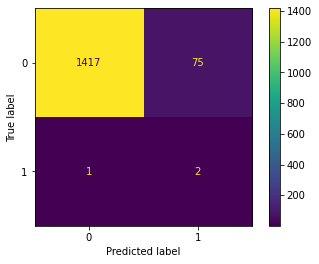

In [ ]:
A9=accuracy_score(ypred9,y_test)
print(A9)
print(classification_report(ypred9,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred9,y_test))

Stacking model 2- by stacking high accuracy models

In [ ]:
estimators=[('knn',KNeighborsClassifier()),('svm',SVC()),('rf',RandomForestClassifier())]
sc1=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())
sc1.fit(X_train,y_train)
ypred10=sc1.predict(X_test)

0.948494983277592
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1495
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1495
   macro avg       0.50      0.47      0.49      1495
weighted avg       1.00      0.95      0.97      1495



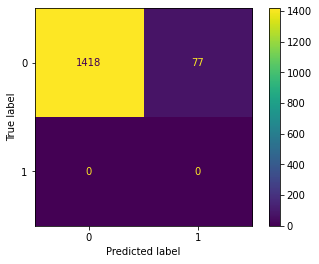

In [ ]:
A10=accuracy_score(ypred10,y_test)
print(A10)
print(classification_report(ypred10,y_test))
print(ConfusionMatrixDisplay.from_predictions(ypred10,y_test))

Accuracy remained same for both stacking models

Checking Accuracy for eeach model

In [ ]:
eval=pd.DataFrame({'model':['K Nearest Neighbour','Support Vector Machine','Naive Bayes','Random Forest','Logistic Regression','Adaboost','Extreme Gradient Boost','Decision Tree','Stacking classifier1','Stacking classifier2'],'Accuracy':[A1*100,A2*100,A3*100,A4*100,A5*100,A6*100,A7*100,A8*100,A9*100,A10*100]})
eval

,model,Accuracy
0,K Nearest Neighbour,94.849498
1,Support Vector Machine,94.849498
2,Naive Bayes,86.555184
3,Random Forest,94.849498
4,Logistic Regression,94.849498
5,Adaboost,94.849498
6,Extreme Gradient Boost,93.712375
7,Decision Tree,91.304348
8,Stacking classifier1,94.916388
9,Stacking classifier2,94.849498


Plotting Accuracy

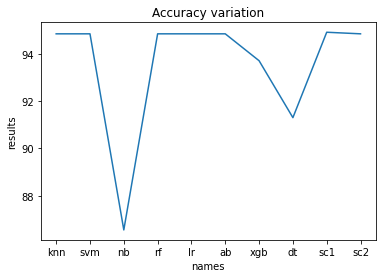

In [ ]:
x=['knn','svm','nb','rf','lr','ab','xgb','dt','sc1','sc2']
y=[A1*100,A2*100,A3*100,A4*100,A5*100,A6*100,A7*100,A8*100,A9*100,A10*100]
plt.plot(x,y)
plt.xlabel('names')
plt.ylabel('results')
plt.title('Accuracy variation')
plt.show()